# Draft analysis 

---

Group name:

---


## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 

In the last 30 years, the dating approach has changed and has become increasingly difficult. The willingness to date has decreased, dating is too expensive and time consuming, we have too many (perceived) options to date someone and we struggle because of accepting too easily negative sex stereotypes. In the 19th century, a custom in the United States called New Year’s Calling, was that on New Year's Day many young, single women would hold an Open House (a party or reception during which a person's home is open to visitors) on 1 January where they would invite eligible bachelors, both friends and strangers, to stop by for a brief (no more than 10–15-minute) visit. This custom was established with the term SpeedDating as a registered trademark by Aish HaTorah, who began hosting SpeedDating events in 1998. 

10 years later, Fisman et al. conducted a survey regarding speed dating habits and collected 8,000 observations during his 2 – year observation in his paper Gender Differences in Mate Selection: Evidence from a Speed Dating Experiment. Because speed dating has become more and more interesting in the last few years and also through Corona a completely new dating approach has emerged, we want to discuss contexts in speed dating. With the data from this survey, we want to answer the following research questions:

TODO:
-   What are the most effective characteristics to achieve a match in opposite sex speed dating?

To answer our research question, we defined the following sub-questions to strengthen our main research question:

-   Do specific characteristics affect the match selection of the survey participants?
-   Do these specific characteristics occur in both sexes?
-   What type of persons participate in speed dating events?
-   After three weeks, how many contacts did each type of person have?
-   Is there a significant difference between the number of men calling women or women calling men after three weeks?

The following hypotheses support our research question:

Null hypothesis: 
-   There is no affection of having specific characteristics regarding match selection of the survey participants
-   There is no correlation between shared interests, attributes and getting a match

Hypotheses:
-   Survey participants who both have the specific characteristics samerace and opposite gender tend to achieve more matches
-   Survey participants with a higher income tend to achieve more matches than survey participants with a lower income
-   Achieving matches because of having the same specific characteristics occur in both sexes
-   Three weeks after the event, males called women more often

## Data dictionary
### General information

| Name     | Description                                                                                                         | Role      | Type    | Format   |
|----------|---------------------------------------------------------------------------------------------------------------------|-----------|---------|----------|
| iid      | Unique subject number (wave + id + gender)                                                                          | ID        | numeric | int      |
| id       | Subject number within wave                                                                                          | ID        | numeric | int      |
| gender   | Gender of the person. Female = 0, Male = 1                                                                          | predictor | nominal | category |
| idg      | Subject number within gender (id + gender)                                                                          | ID        | numeric | int      |
| condtn   | Condition of the wave, 1 = Limited choice, 2 = extensive choice                                                     | predictor | nominal | category |
| wave     | ID of the event                                                                                                     | ID        | numeric | int      |
| round    | Number of people that met in wave                                                                                   | predictor | numeric | int      |
| position | Station number where met partner                                                                                    | predictor | numeric | int      |
| positin1 | Station number where started                                                                                        | predictor | numeric | int      |
| order    | The number of date that night when met partner                                                                      | predictor | numeric | int      |
| partner  | Partner's ID number the night of event                                                                              | ID        | numeric | int      |
| pid      | Partner's IID number                                                                                                | ID        | numeric | int      |
| match    | 1 = yes, 0 = no                                                                                                     | response  | nominal | category |
| int_corr | Correlation between participant's and partner's ratings of interests in Time 1                                      | predictor | numeric | float    |
| samerace | Participant and the partner were the same race. 1 =  yes, 0 = no                                                    | predictor | nominal | category |
| age_o    | Age of partner                                                                                                      | predictor | nominal | category |
| race_o   | Race of partner                                                                                                     | predictor | nominal | category |
| pf_o_att | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_sin | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_int | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_fun | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_amb | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_sha | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| dec_o    | Decision of partner the night of event                                                                              | predictor | nominal | category |
| attr_o   | Attractive. Rating by partner the night of the event from 1 (awful) to 10 (great)                                   | predictor | numeric | int      |
| sinc_o   | Sincere. Rating by partner the night of the event from 1 (awful) to 10 (great)                                      | predictor | numeric | int      |
| intel_o  | Intelligent. Rating by partner the night of the event from 1 (awful) to 10 (great)                                  | predictor | numeric | int      |
| fun_o    | Fun. Rating by partner the night of the event from 1 (awful) to 10 (great)                                          | predictor | numeric | int      |
| amb_o    | Ambitious. Rating by partner the night of the event from 1 (awful) to 10 (great)                                    | predictor | numeric | int      |
| shar_o   | Shared Interests/Hobbies. Rating by partner the night of the event from 1 (awful) to 10 (great)                     | predictor | numeric | int      |
| like_o   | Overall, how much do oyu like this person. 1 (don't like at all) to 10 (like a lot)                                 | predictor | numeric | int      |
| prob_o   | How probable do you think it is that this person will say 'yes' for you? 1 (not probable) to 10 (extemely probable) | predictor | numeric | int      |
| met_o    | Have you met this person before? (1 = yes, 2 = no)                                                                  | predictor | ordinal | category |

### Time 1: Survey filled out by students that are interested in participating in order to register for the event

| Name      | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | Role      | Type    | Format   |
|-----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|---------|----------|
| age       | Age of the person                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | predictor | numeric | int      |
| field     | Field of study                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   | predictor | nominal | string   |
| field_cd  | Field of study coded.<br/>1= Law<br/>2= Math<br/>3= Social Science, Psychologist<br/>4= Medical Science, Pharmaceuticals, and Bio Tech<br/>5= Engineering<br/>6= English/Creative Writing/ Journalism<br/>7= History/Religion/Philosophy<br/>8= Business/Econ/Finance<br/>9= Education, Academia<br/>10= Biological Sciences/Chemistry/Physics<br/>11= Social Work<br/>12= Undergrad/undecided<br/>13=Political Science/International Affairs<br/>14=Film<br/>15=Fine Arts/Arts Administration<br/>16=Languages<br/>17=Architecture<br/>18=Other | predictor | nominal | category |
| mn_sat    | Median SAT score for the undergraduate institution where attended. Proxy for intelligence.                                                                                                                                                                                                                                                                                                                                                                                                                                                       |           |         |          |
| tuition   | Tuition listed for each response to undergrad                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |           |         |          |
| race      | Race of the attendee<br/>1 = Black/African American<br/>2 = European/Caucasian-American<br/>3 = Latino/Hispanic American<br/>4 = Asian/Pacific Islander/Asian-American<br/>5 = Native American<br/>6 = Other                                                                                                                                                                                                                                                                                                                                     | predictor | nominal | category |
| imprace   | How important is it that a person you date be of the same racial/ethic background? (1 - 10)                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| imprelig  | How important is it that a person you date be of the same religious background? (1 - 10)                                                                                                                                                                                                                                                                                                                                                                                                                                                         | predictor | numeric | int      |
| from      | Where the person is originally from                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | nominal | string   |
| zipcode   | Zip code of the grow up area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | predictor | nominal | category |
| income    | Median household income based on zipcode                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | predictor | numeric | float    |
| goal      | What is the goal in participating in this event?<br/>1 = Seemed like a fun night out<br/>2 = To meet new people<br/>3 = To get a date<br/>4 = Looking for a serious relationship<br/>5  = To say I did it<br/>6 = Other                                                                                                                                                                                                                                                                                                                          | predictor | nominal | category |
| date      | How frequently do you go on dates? <br/>1 = Several times a week<br/>2 = Twice a week<br/>3 = Once a week<br/>4 = Twice a month<br/>5 = Once a month<br/>6 = Several times a year<br/>7 = Almost never                                                                                                                                                                                                                                                                                                                                           | predictor | ordinal | category |
| go out    | How often do you go out (not necessarily on dates)?<br/>1 = Several times a week<br/>2 = Twice a week<br/>3 = Once a week<br/>4 = Twice a month<br/>5 = Once a month<br/>6 = Several times a year<br/>7 = Almost never                                                                                                                                                                                                                                                                                                                           | predictor | ordinal | category |
| career    | What is your intended career?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | predictor | nominal | string   |
| career_c  | Career coded.<br/>1 = Lawyer<br/>2 = Academic/Research<br/>3 = Psychologist<br/>4 = Doctor/Medicine<br/>5 =Engineer<br/>6 = Creative Arts/Entertainment<br/>7 = Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin<br/>8 = Real Estate<br/>9 = International/Humanitarian Affairs<br/>10 = Undecided<br/>11 = Social Work<br/>12 = Speech Pathology<br/>13 = Politics<br/>14 = Pro sports/Athletics<br/>15 = Other<br/>16 = Journalism<br/>17 = Architecture                                                                   | predictor | nominal | category |
| sports    | Playing sports/athletics. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | predictor | numeric | int      |
| tvsports  | Watching sports. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | int      |
| excersice | Body building/exercising. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | predictor | numeric | int      |
| dining    | Dining out. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  | predictor | numeric | int      |
| museums   | Museums/galleries. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | predictor | numeric | int      |
| art       | Art. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | predictor | numeric | int      |
| hiking    | Hiking/camping. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | int      |
| gaming    | Gaming. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| clubbing  | Dancing/clubbing. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            | predictor | numeric | int      |
| reading   | Reading. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | predictor | numeric | int      |
| tv        | Watching TV. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | predictor | numeric | int      |
| theater   | Theater. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | predictor | numeric | int      |
| movies    | Movies. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| concerts  | Going to concerts. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | predictor | numeric | int      |
| music     | Music. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| shopping  | Shopping. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | predictor | numeric | int      |
| yoga      | Yoga/meditation. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | int      |
| exhappy   | Overall, how happy do you expect to be with the people you meet during the event? (1 - 10)                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| expnum    | Out of 20 people, how many do you expect will be interested in dating you?                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| attr1_1   | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| sinc1_1   | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| intel1_1  | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| fun1_1    | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| amb1_1    | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| shar1_1   | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| attr4_1   | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| sinc4_1   | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| intel4_1  | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| fun4_1    | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| amb4_1    | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| shar4_1   | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| attr2_1   | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| sinc2_1   | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| intel2_1  | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| fun2_1    | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| amb2_1    | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| shar2_1   | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| attr3_1   | Rate yourself from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| sinc3_1   | Rate yourself from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| intel3_1  | Rate yourself from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| fun3_1    | Rate yourself from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| amb3_1    | Rate yourself from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| shar3_1   | Rate yourself from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| attr5_1   | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| sinc5_1   | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| intel5_1  | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| fun5_1    | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| amb5_1    | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |
| shar5_1   | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | numeric | int      |

<br>

> Careful: For all attributes *_1, *_2 and *_4, wave 6-9 rated the importance of the attributes in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important).<br>
> Waves 1-5 and 10-21 distribued 100 points among the attributes. Total points must equal 100.


### Round 2: Filled out by subjects after each "date" during the event.

| Name  | Description                                                                                                         | Role      | Type    | Format   |
|-------|---------------------------------------------------------------------------------------------------------------------|-----------|---------|----------|
| dec   | Decision if you want to see the person again (1) or not (0)                                                         | predictor | nominal | category |
| attr  | Rating of the attribute for this person from 1 - 10.                                                                | predictor | numeric | int      |
| sinc  | Rating of the attribute for this person from 1 - 10.                                                                | predictor | numeric | int      |
| intel | Rating of the attribute for this person from 1 - 10.                                                                | predictor | numeric | int      |
| fun   | Rating of the attribute for this person from 1 - 10.                                                                | predictor | numeric | int      |
| amb   | Rating of the attribute for this person from 1 - 10.                                                                | predictor | numeric | int      |
| shar  | Rating of the attribute for this person from 1 - 10.                                                                | predictor | numeric | int      |
| like  | Overall, how much do oyu like this person. 1 (don't like at all) to 10 (like a lot)                                 | predictor | numeric | int      |
| prob  | How probable do you think it is that this person will say 'yes' for you? 1 (not probable) to 10 (extemely probable) | predictor | numeric | int      |
| met   | Have you met this person before? (1 = yes, 2 = no)                                                                  | predictor | ordinal | category |

### Half way through meeting all potential dates during the night of the event on their scorecard

| Name     | Description                                                           | Role      | Type    | Format |
|----------|-----------------------------------------------------------------------|-----------|---------|--------|
| attr1_s  | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | numeric | int    |
| sinc1_s  | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | numeric | int    |
| intel1_s | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | numeric | int    |
| fun1_s   | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | numeric | int    |
| amb1_s   | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | numeric | int    |
| shar1_s  | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | numeric | int    |
| attr4_s  | Rate yourself from 1 - 10                                             | predictor | numeric | int    |
| sinc4_s  | Rate yourself from 1 - 10                                             | predictor | numeric | int    |
| intel4_s | Rate yourself from 1 - 10                                             | predictor | numeric | int    |
| fun4_s   | Rate yourself from 1 - 10                                             | predictor | numeric | int    |
| amb4_s   | Rate yourself from 1 - 10                                             | predictor | numeric | int    |

### Time 2: Survey is filled out the day after participating in the event. Subjects must have submitted this in order to be sent their matches.

| Name     | Description                                                                                               | Role      | Type    | Format   |
|----------|-----------------------------------------------------------------------------------------------------------|-----------|---------|----------|
| satis_2  | Overall, how satisfied were you with the people you met? (1=not at all satisfied, 10=extremely satisfied) | predictor | numeric | int      |
| length   | Four minutes is:<br/>1 = Too little,<br/>2 = Too much<br/>3 = Just Right                                  | predictor | nominal | category |
| numdat_2 | The number of Speed "Dates" you had was:<br/>1 = Too few,<br/>2 = Too many,<br/>3 = Just right            | predictor | nominal | category |

... and again the same questions regarding attributes

### Time 3: Subjects filled out 3-4 weeks after they had been sent their matches

| Name     | Description                                                           | Role      | Type    | Format   |
|----------|-----------------------------------------------------------------------|-----------|---------|----------|
| you_call | How many have you contacted to set up a date?                         | predictor | numeric | int      |
| them_cal | How many have contacted you?                                          | predictor | numeric | int      |
| date_3   | Have you been on a date with any of your matches? Yes=1 No=2          | predictor | nominal | category |
| numdat_3 | If yes, how many of your matches have you been on a date with so far? | predictor | numeric | int      |
| num_in_3 | If yes, how many?                                                     | predictor | numeric | int      |

... and again the same questions regarding attributes

<br>

- `Role`: response, predictor, ID (ID columns are not used in a model but can help to better understand the data)

- `Type`: nominal, ordinal or numeric

- `Format`: int, float, string, category, date or object

### Descriptive terms for our used variables 

| Name  | Description                                                                                                         | Descriptive term      | 
|-------|---------------------------------------------------------------------------------------------------------------------|-----------|
| calls   | Event of a participant conducting a "you_call" or "them_cal" with the other party                                 | Calls of participants |
| attr  | Rating of the attribute for this person from 1 - 10.                                                                | Attractivity of speed dating participant | 
| sinc  | Rating of the attribute for this person from 1 - 10.                                                                | Sincerety of speed dating participant | 
| intel | Rating of the attribute for this person from 1 - 10.                                                                | Intelligence of speed dating participant  | 
| fun   | Rating of the attribute for this person from 1 - 10.                                                                | Humor of speed dating participant | 
| amb   | Rating of the attribute for this person from 1 - 10.                                                                | Ambition of speed dating participant | 
| shar  | Rating of the attribute for this person from 1 - 10.                                                                | Shared Interests/Hobbies of the speed dating participant to the other party | 
| like  | Overall, how much do oyu like this person. 1 (don't like at all) to 10 (like a lot)                                 | Strength of like of speed dating participant to the other party | 
| prob  | How probable do you think it is that this person will say 'yes' for you? 1 (not probable) to 10 (extemely probable) | Probability of speed dating participant to like the other party | 
| met   | Have you met this person before? (1 = yes, 2 = no)                                                                  | Meeting indicator of participants | 
| gender   | Gender of the person. Female = 0, Male = 1                                                                       | Gender of speed dating participant |
| order    | The number of date that night when met partner                                                                   | Order of date of speed dating participant and the other party during event  |
| match    | 1 = yes, 0 = no                                                                                                  | Match of the speed dating participant and the other party  |
| int_corr | Correlation between participant's and partner's ratings of interests in Time 1                                   | Correlation of the speed dating participant and the other party |
| samerace | Participant and the partner were the same race. 1 =  yes, 0 = no                                                 | Indicates, if the speed dating participant and the other party have the same race  |
| age       | Age of the person                                                                                               | Age of speed dating participant |
| age_o    | Age of partner                                                                                                   | Age of other party |
| race      | Race of the attendee<br/>1 = Black/African American<br/>2 = European/Caucasian-American<br/>3 = Latino/Hispanic American<br/>4 = Asian/Pacific Islander/Asian-American<br/>5 = Native American<br/>6 = Other                                                                                                           | Race of speed dating participant |
| race_o   | Race of partner                                                                                                     | Race of other party |
| imprace   | How important is it that a person you date be of the same racial/ethic background? (1 - 10)                        | Importance of the other party having the same race as the speed dating participant |
| intel_o   | Intelligent. Rating by partner the night of the event from 1 (awful) to 10 (great)                                 | Intelligence of the other party |
| sinc_o    | Sincere. Rating by partner the night of the event from 1 (awful) to 10 (great)                                     | Sincerety of the other party |
| like_o   | Overall, how much do oyu like this person. 1 (don't like at all) to 10 (like a lot)                        | Strength of like of to the other party |
| prob_o   | How probable do you think it is that this person will say 'yes' for you? 1 (not probable) to 10 (extemely probable)                        | Probability of the other party to like speed dating participant |
| fun_o   | Fun. Rating by partner the night of the event from 1 (awful) to 10 (great)                        | Humor of the other party |
| satis_2   | Generic Id                         | Generic Id  |
| amb_o   | Ambitious. Rating by partner the night of the event from 1 (awful) to 10 (great)                        | Ambition of the other party |
| shar_o   | Shared Interests/Hobbies. Rating by partner the night of the event from 1 (awful) to 10 (great)                          | Shared Interests/Hobbies of the other party to speed dating participant |
| attr_o   | Attractive. Rating by partner the night of the event from 1 (awful) to 10 (great)                        | Attractivity of the other party |
| met_o   | Have you met this person before? (1 = yes, 2 = no)                         | Meeting indicator of the other party  |
| exphappy   | Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?                        | Expected Happiness of meeting people |
| pid   | partner's iid number                       | partner's iid number |

## Setup

In this section we will import important libraries and funtions in order to create our data frames, calculations and visualizations


In [277]:
%matplotlib inline
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns

from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression,f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy import stats
import xgboost as xg
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Data

Data was taken from here: https://perso.telecom-paristech.fr/eagan/class/igr204/datasets/SpeedDating.csv

We create our data frame out of the imported csv data from our data source


## Import data

In [278]:
df = pd.read_csv("../data/interim/TransformedData",delimiter=",", index_col=0)

We have 195 attributes in this dataset, this is a lot. We already see some NaN values which we'll have to eliminate later.

In [279]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


### Data structure

Currently there are 175 float values, 13 int values and 7 object values. We already identified some values that should rather be categorical.

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(13), object(7)
memory usage: 12.5+ MB


### Data corrections

In fact we created lists for each data type so we can map the attributes easier.

In [281]:
cat_vars = [
    "gender",
    "condtn",
    "match",
    "samerace",
    "age_o",
    "race_o",
    "dec_o",
    "met_o",
    "field_cd",
    "race",
    "zipcode",
    "goal",
    "date",
    "go_out",
    "career_c",
    "dec",
    "met",
    "length",
    "numdat_2",
    "date_3",
]

float_vars = [
    "int_corr",
    "pf_o_att",
    "pf_o_sin",
    "pf_o_int",
    "pf_o_fun",
    "pf_o_amb",
    "pf_o_sha",
    "income",
    "attr1_1",
    "sinc1_1",
    "intel1_1",
    "fun1_1",
    "amb1_1",
    "shar1_1",
    "attr4_1",
    "sinc4_1",
    "intel4_1",
    "fun4_1",
    "amb4_1",
    "shar4_1",
    "attr2_1",
    "sinc2_1",
    "intel2_1",
    "fun2_1",
    "amb2_1",
    "shar2_1"
]

int_vars = [
    "gender",    
    "samerace",
     "met", 
     "age_o",
    "race_o",
    "dec_o",
    "met_o",
    "attr_o",
    "sinc_o",
    "intel_o",
    "fun_o",
    "amb_o",
    "shar_o",
    "like_o",
    "prob_o",
    "age",
    "imprace",
    "imprelig",
    "sports",
    "tvsports",
    "exercise",
    "dining",
    "museums",
    "art",
    "hiking",
    "gaming",
    "clubbing",
    "reading",
    "tv",
    "theater",
    "movies",
    "concerts",
    "music",
    "shopping",
    "yoga",
    "exphappy",
    "attr3_1",
    "sinc3_1",
    "intel3_1",
    "fun3_1",
    "amb3_1",
    "attr5_1",
    "sinc5_1",
    "intel5_1",
    "fun5_1",
    "amb5_1",
    "attr",
    "sinc",
    "intel",
    "fun",
    "amb",
    "shar",
    "like",
    "prob",
    "attr1_s",
    "sinc1_s",
    "intel1_s",
    "fun1_s",
    "amb1_s",
    "shar1_s",
    "attr3_s",
    "sinc3_s",
    "intel3_s",
    "fun3_s",
    "amb3_s",
    "satis_2",
    "iid",
    "id",
    "idg",
    "wave",
    "round",
    "order",
    "partner",
    "pid",
    "expnum",
    "you_call",
    "them_cal",
    "numdat_3",
    "num_in_3",
    "position",
    "positin1",
]

str_vars = [
    "field",
    "from",
    "career"
]

unused_vars = [
    "undergrd",
    "mn_sat",
    "tuition"
]


In [282]:
df[float_vars]=df[float_vars].astype("float",copy=False)
df[str_vars]=df[str_vars].astype("str",copy=False)

In order to answer our research question, we select the following variables from our variables list and rename them for a better understanding.

We also use descriptive terms in order to recognize our variables better

In [283]:
df2=df[float_vars + int_vars].fillna(0).copy()
dflike=df2["like"]
df2.drop(columns="like",inplace=True)
df[cat_vars]=df[cat_vars].astype("category",copy=False)
df = df.rename(columns={"order": "Order", "intel_o": "Intelligence_opposite", "sinc_o": "Sincerety_opposite", "like_o": "Like_opposite", "prob_o": "Probability_opposite", "fun_o": "Humor_opppsite", "satis_2": "Satis_generic_id", "amb_o": "Ambition_opposite", "shar_o": "Shared_Interests_opposite", "attr_o": "Attractivity_opposite", "met_o": "Met_opposite", "exphappy": "Expected_Happiness", "pid": "Partner_Id", "fun": "Humor", "shar": "Shared_Interests", "attr": "Attractivity", "prob": "Probability", "intel": "Intelligence", "sinc": "Sincerety", "amb": "Ambition", "age": "Age", "like": "Like"})
df2 = df2.rename(columns={"order": "Order", "intel_o": "Intelligence_opposite", "sinc_o": "Sincerety_opposite", "like_o": "Like_opposite", "prob_o": "Probability_opposite", "fun_o": "Humor_opppsite", "satis_2": "Satis_generic_id", "amb_o": "Ambition_opposite", "shar_o": "Shared_Interests_opposite", "attr_o": "Attractivity_opposite", "met_o": "Met_opposite", "exphappy": "Expected_Happiness", "pid": "Partner_Id", "fun": "Humor", "shar": "Shared_Interests", "attr": "Attractivity", "prob": "Probability", "intel": "Intelligence", "sinc": "Sincerety", "amb": "Ambition", "age": "Age", "like": "Like"})

In [284]:
#variables = ['Attractivity', 'Age','Sincerety', 'Intelligence', 'Humor', 'Ambition', 'Shared_Interests', 'Probability',"Intelligence_opposite","Sincerety_opposite","Probability_opposite","Humor_opppsite","Ambition_opposite","Shared_Interests_opposite","Attractivity_opposite","Expected_Happiness","Order",'Like']
variables= ['Attractivity','Sincerety', 'Intelligence', 'Humor', 'Ambition', 'Shared_Interests', 'Probability',"Like"]
df = df[variables].fillna(value={"income":0})

# Use SelectKBest to determine most influential features for regression

We use this to determine the most influential Predictors for the "Like" Outcome

Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [285]:
#Suppose, we select 5 features with top 20 Fisher scores
selector = SelectKBest(f_regression,k=20 )
X_new = selector.fit(df2, dflike)
names = df2.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])

[Text(0.5, 1.0, 'F_Scores per Feature')]

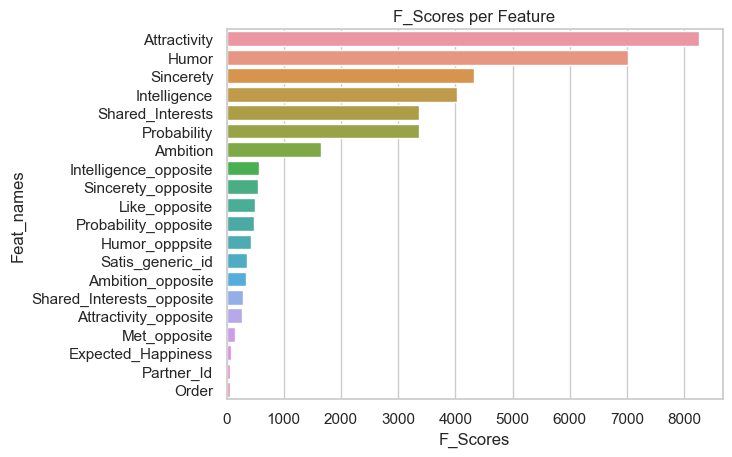

In [286]:
a=sns.barplot(ns_df_sorted,y="Feat_names",x="F_Scores")
a.set(title='F_Scores per Feature')

### From the features in the Dataset, the most influential ones are:
- Attractivity
- Humor
- Sincerity
- Intelligence
- Shared_Interests
- Probabiliry
- Ambition

The Opposite Features will be neglected, since their relative F-Score is rather low in comparison.

# Data Cleaning

In the following steps, we will drop NaN Values to make sure that the models do only get full data entries.
<br>
No filler Method was chosen, since assumptions on how the feature value would be are not permissible.

Text(0.5, 1.0, 'NaN share of the observations per variable')

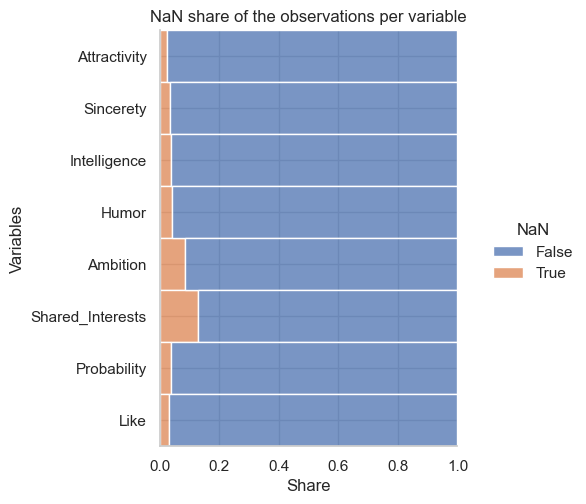

In [287]:
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)
g.set_axis_labels("Share", "Variables")
plt.title('NaN share of the observations per variable')

We will drop ~ 1000 Rows, where the feature Shared_Interests = NaN

In [288]:
df.isna().sum()

Attractivity         202
Sincerety            277
Intelligence         296
Humor                350
Ambition             712
Shared_Interests    1067
Probability          309
Like                 240
dtype: int64

In [289]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

Text(0.5, 1.0, 'NaN share of the observations per variable ')

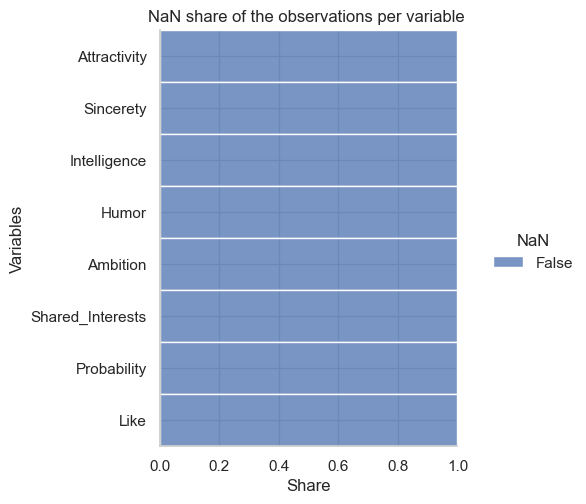

In [290]:
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)
g.set_axis_labels("Share", "Variables")
plt.title('NaN share of the observations per variable ')


### Variable lists
We define the predictor variable (y) as match and our features accordingly.

Because we can do different analysis on categorical and numerical values, we separate them in different lists.

The features we think are the most important (humor, shared interests etc.) are called personal attributes from now on.

In [291]:
y_label = variables.pop()
features = variables

X = df[features]
y = df[y_label]

### Data splitting

We do a test/train split with 20/80% of the data.

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42)

## Analysis

### Descriptive statistics
- The first thing to notice here is that the personal attributes are collected bewteen 0 and 10.
- Humor, intelligence, sincerity and ambition was rated a bit higher than shared interests and attractivity.
- On average, people seem to be liked a decent amount

In [293]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attractivity,6963.0,6.192360,1.947634,0.0,5.0,6.0,8.0,10.0
Sincerety,6963.0,7.163004,1.741066,0.0,6.0,7.0,8.0,10.0
Intelligence,6963.0,7.357748,1.556295,0.0,6.0,7.0,8.0,10.0
Humor,6963.0,6.395376,1.954875,0.0,5.0,7.0,8.0,10.0
Ambition,6963.0,6.758940,1.793595,0.0,6.0,7.0,8.0,10.0
Shared_Interests,6963.0,5.457633,2.144922,0.0,4.0,6.0,7.0,10.0
Probability,6963.0,5.252836,2.142212,0.0,4.0,5.0,7.0,10.0
Like,6963.0,6.130360,1.847802,0.0,5.0,6.0,7.0,10.0


### Exploratory data analysis

In [294]:
alt.Chart(df).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=features
).properties(title="Count of record per Feature")

c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

When checking for correlations, it can be determined, that there is almost always a posivite linear relationship between the Personal Attributes and Like

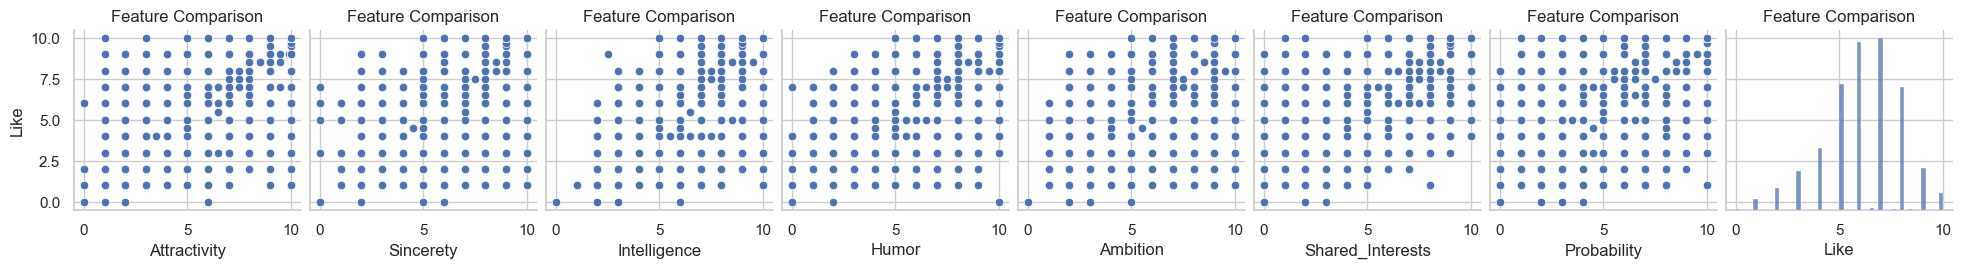

In [295]:
sns.pairplot(df, y_vars='Like').set(title='Feature Comparison')


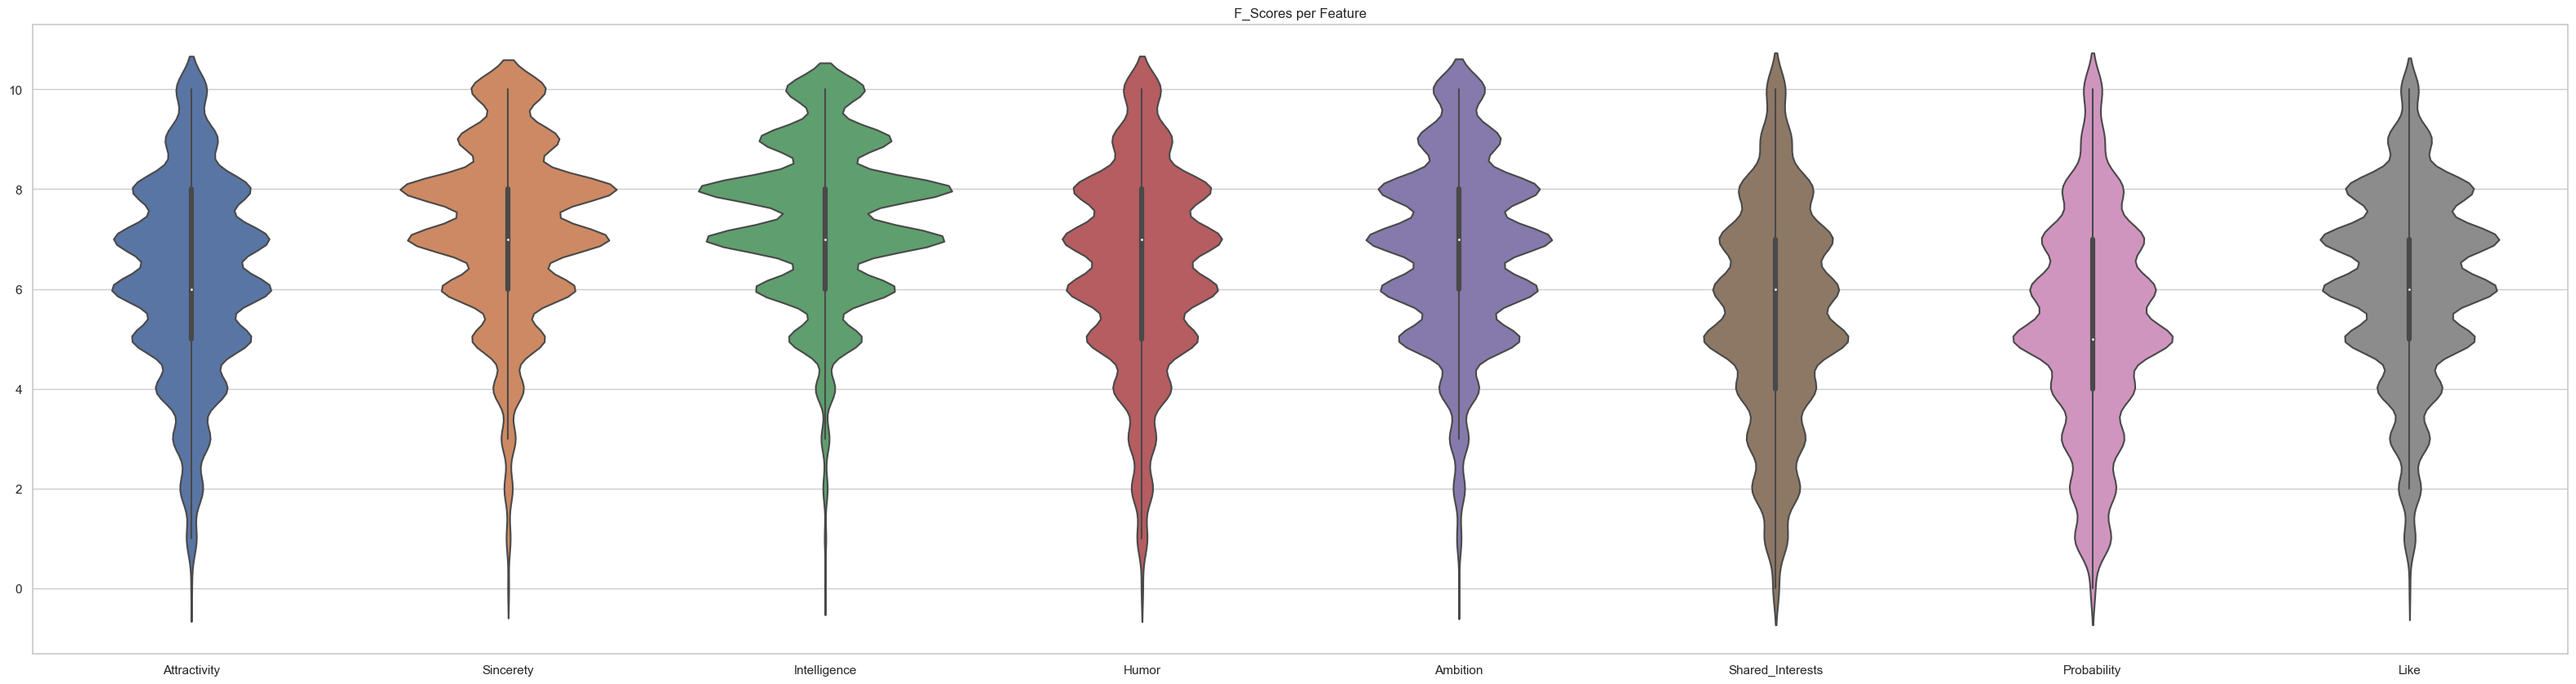

In [296]:
b=sns.violinplot(df)
b.set(title='F_Scores per Feature')
b.figure.set_size_inches(40,10)

### Relationships

In [297]:
# inspect correlation between outcome and possible predictors
corr = df.corr()
corr['Like'].sort_values(ascending=False)

Like                1.000000
Humor               0.689726
Attractivity        0.667723
Shared_Interests    0.660098
Sincerety           0.520797
Intelligence        0.506232
Probability         0.482469
Ambition            0.444707
Name: Like, dtype: float64

It seems that all personal attributes correlate with the outcome variable Like

In [298]:
corr.style.background_gradient(cmap='Blues')

,Attractivity,Sincerety,Intelligence,Humor,Ambition,Shared_Interests,Probability,Like
Attractivity,1.000000,0.404222,0.383888,0.589231,0.354461,0.486769,0.277206,0.667723
Sincerety,0.404222,1.000000,0.665593,0.507224,0.462317,0.397207,0.332566,0.520797
Intelligence,0.383888,0.665593,1.000000,0.498910,0.627679,0.401485,0.280665,0.506232
Humor,0.589231,0.507224,0.498910,1.000000,0.492723,0.615875,0.390512,0.689726
Ambition,0.354461,0.462317,0.627679,0.492723,1.000000,0.431798,0.280203,0.444707
Shared_Interests,0.486769,0.397207,0.401485,0.615875,0.431798,1.000000,0.474377,0.660098
Probability,0.277206,0.332566,0.280665,0.390512,0.280203,0.474377,1.000000,0.482469
Like,0.667723,0.520797,0.506232,0.689726,0.444707,0.660098,0.482469,1.000000


## Model Regression

### Select model

Start with Linear Regression

In [299]:
# select the linear regression model
reg = LinearRegression()

### Training and validation Regression

When looking at the NMSE value, it can be determined that the Model is pretty robust, since no majour outliers are within the graphs 

In [300]:
scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error') *-1
# store cross-validation scores
df_scores = pd.DataFrame({"lr": scores})

# reset index to match the number of folds
df_scores.index += 1

# print dataframe
df_scores.style.background_gradient(cmap='Blues')

,lr
1,1.119776
2,1.143680
3,1.062097
4,1.132503
5,1.148116


In [301]:
alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("lr", aggregate="mean", title="Mean squared error (MSE)")
).properties(title="Mean squared error (MSE) per Fold")

c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [302]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,1.121234,0.034831,1.062097,1.119776,1.132503,1.14368,1.148116


### Fit model

Fit the Model with the actual Train variables

In [303]:
# Fit the model to the data
reg.fit(X_train, y_train)

LinearRegression()

### Evaluation on test set
Start Predictions with train and test set

In [304]:
# obtain predictions
y_pred = reg.predict(X_test)
y_predtrain=reg.predict(X_train)

Comparing the R^2 Scores of the train and Test set, it can be stated that the Models perform pretty well, and no mayor discrepancies between the train and test splits can be found

In [305]:
print('R squared training set', r2_score(y_train, y_predtrain).round(3))
print('R squared test set', r2_score(y_test, y_pred).round(3))

R squared training set 0.669
R squared test set 0.692


Save the Intercept and Coeffitients for later user

In [306]:
importance = np.abs(reg.coef_)
interceptImp = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":reg.intercept_
    ,"reg":"MultiLinear"}
    )
df_imp = pd.DataFrame({"Coefficient": importance, 
                       "Name": features,"reg":"MultiLinear"})

df_imp= pd.concat([interceptImp,df_imp])


### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

In [307]:
folder = '../models/'
pkl_filename_reg = 'clf_reg_20221222.pkl'
with open(folder + pkl_filename_reg, 'wb') as file:
    pickle.dump(reg, file)

In [308]:
with open(folder + pkl_filename_reg, 'rb') as file:
    pickle_model = pickle.load(file)

pickle_model

LinearRegression()

# Model Lasso
Start with getting the best alpha hyperparemeter through the LassoCV function

In [309]:
lasso = LassoCV(cv=5,random_state=0,max_iter=15000)
lasso.fit(X_train,y_train)

LassoCV(cv=5, max_iter=15000, random_state=0)

Set a standard Lasso Regression with the previously determined alpha

In [310]:
# Set best alpha
lasso_best = Lasso(alpha=lasso.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.018149939617142067)

When comparing R^2 scores, it can be determined that the model also performs well and has no major discrepancies between train and test set.
<br>
This means that there was no over or underfitting

In [311]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 66.93
R squared test set 69.22


Save the Coefficients and Intercept for later use

In [312]:
importance = np.abs(lasso_best.coef_)
interceptLasso = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[lasso_best.intercept_]
    ,"reg":"Lasso"}
    )
df_lasso = pd.DataFrame({"Coefficient": importance, 
                       "Name": features,"reg":"Lasso"})
df_lasso=pd.concat([interceptLasso,df_lasso])
dfdisplay=pd.concat([df_imp,df_lasso])

### Cross Validation for Alpha

The graph below futher states, that there is little to no variance between folds and all variables behave roughtly the same for a given alpha

(0.001821337108094456,
 3.6340452946352664,
 0.9353675244881134,
 3.7235898586059237)

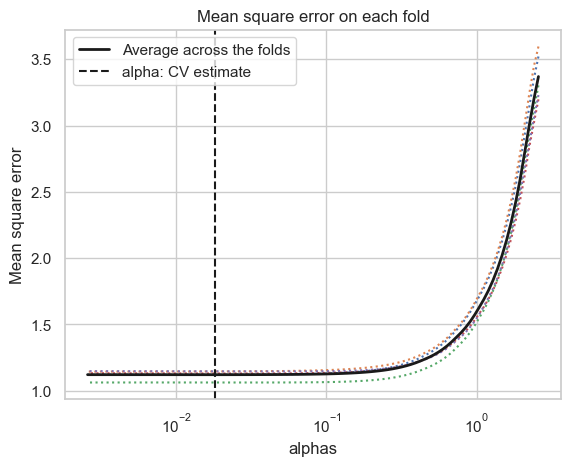

In [313]:
plt.semilogx(lasso.alphas_, lasso.mse_path_, ":")
plt.plot(
    lasso.alphas_ ,
    lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")


## Save Lasso Model
save the Model for future use

In [314]:
folder = '../models/'
pkl_filenamelasso = 'clf_lasso_20221222.pkl'
with open(folder + pkl_filenamelasso, 'wb') as file:
    pickle.dump(lasso_best, file)

# XG Boost

For XG Boost, two models will be used.
One with the gblinear booster and one without.


In [315]:
regxg= xg.XGBRegressor(eval_metric='rmsle',booster='gblinear')

In [316]:
regxgnolin= xg.XGBRegressor(eval_metric='rmsle')

Define and search for ideal hyperparameters

In [317]:
param_grid = { "n_estimators": [100,500, 600, 700],
              "learning_rate": [0.01, 0.015,0.08,0.5]}

In [318]:
param_grid_nolinear = {"max_depth": [2,5, 8, 10],
              "n_estimators": [100,500, 600, 700],
              "learning_rate": [0.01, 0.015,0.08,0.5]}

In [319]:
searchnolinear = GridSearchCV(regxgnolin, param_grid_nolinear, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",searchnolinear.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 2, 'n_estimators': 700}


In [320]:
search = GridSearchCV(regxg, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\base.py", line 721, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\metrics\_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\sklearn\me

The best hyperparameters are  {'learning_rate': 0.08, 'n_estimators': 700}


Fit both models with the previously found hyperparameter values

In [321]:
regxg=xg.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],booster='gblinear')

regxg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=-1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=0, num_parallel_tree=None, predictor=None,
             random_state=0, ...)

In [322]:
regxgnolin=xg.XGBRegressor(learning_rate = searchnolinear.best_params_["learning_rate"],
                           n_estimators  = searchnolinear.best_params_["n_estimators"],
                           max_depth = searchnolinear.best_params_["max_depth"])

regxgnolin.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.015, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=700, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Make Predictions

In [323]:
predictionsnolin = regxgnolin.predict(X_test)

In [324]:
predictions = regxg.predict(X_test)

Can only store coefficients for the linear boosted model of XGBoost, because only the gblinear model spits out intercept and coeffitients for future use

In [325]:
importance = np.abs(regxg.coef_)
interceptXG = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":regxg.intercept_
    ,"reg":"XGBoost"}
    )
df_xgboost = pd.DataFrame({"Coefficient": importance, 
                       "Name": features,"reg":"XGBoost"})
df_xgboost= pd.concat([interceptXG,df_xgboost])
dfdisplay=pd.concat([df_imp,df_lasso,df_xgboost
])

## Save XGBoost Models


In [326]:
folder = '../models/'
pkl_filenamexgboost = 'clf_xgboost_20221222.pkl'
with open(folder + pkl_filenamexgboost, 'wb') as file:
    pickle.dump(regxg, file)

In [327]:
folder = '../models/'
pkl_filenamexgboostnolin = 'clf_xgboostnolinear_20221222.pkl'
with open(folder + pkl_filenamexgboostnolin, 'wb') as file:
    pickle.dump(regxgnolin, file)

# Model Comparison

Comparison of all models for MAE, RMSE, MSE and R2 Value. 
<br>
It can be clearly seen, that almost no model behaves differently and all produce roughtly the same error

In [328]:
Compdf = pd.DataFrame({"Type": ["MAE", "RMSE", "MSE", "R2", "MAE", "RMSE", "MSE", "R2", "MAE", "RMSE", "MSE", "R2", "MAE", "RMSE", "MSE", "R2"],
 "Values": [mean_absolute_error(y_test, y_pred).round(3), mean_squared_error(y_test, y_pred, squared=False).round(3), mean_squared_error(y_test, y_pred).round(
    3), r2_score(y_test, y_pred).round(3), mean_absolute_error(y_test, lasso_best.predict(X_test)).round(3), mean_squared_error(y_test, lasso_best.predict(X_test), squared=False).round(3), mean_squared_error(y_test, lasso_best.predict(X_test)).round(3), r2_score(y_test, lasso_best.predict(X_test)).round(3),
    mean_absolute_error(y_test, predictions).round(3), mean_squared_error(y_test, predictions, squared=False).round(3), mean_squared_error(y_test, predictions).round(
    3), r2_score(y_test, predictions).round(3), mean_absolute_error(y_test, predictionsnolin).round(3), mean_squared_error(y_test, predictionsnolin, squared=False).round(3), mean_squared_error(y_test, predictionsnolin).round(
    3), r2_score(y_test, predictionsnolin).round(3)],"Model":["Multiple Regresion","Multiple Regresion","Multiple Regresion","Multiple Regresion","Lasso","Lasso","Lasso","Lasso","XGBOOST","XGBOOST","XGBOOST","XGBOOST","XGBOOST_NO_LINEAR","XGBOOST_NO_LINEAR","XGBOOST_NO_LINEAR","XGBOOST_NO_LINEAR"]})

[Text(0.5, 1.0, 'Model comparison')]

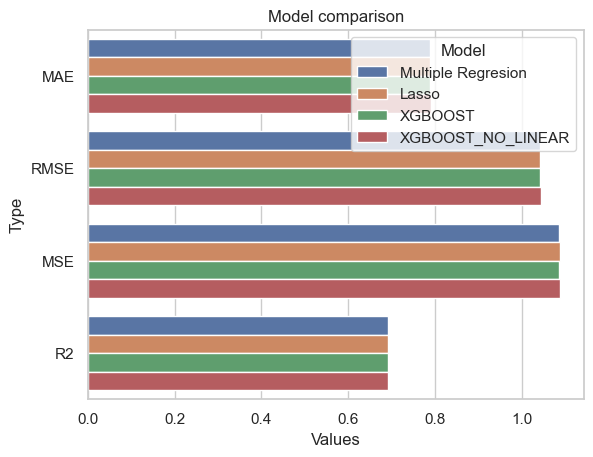

In [329]:
sns.barplot(Compdf,y="Type",x="Values",hue="Model").set(title='Model comparison')

## Feature Importance

It can be stated, that Attractivity is the most determining factor for the regression models.
<br>
after Attractivity, Humor and Shared Interests seem to be the second and third most influential

[Text(0.5, 1.0, 'Model comparison')]

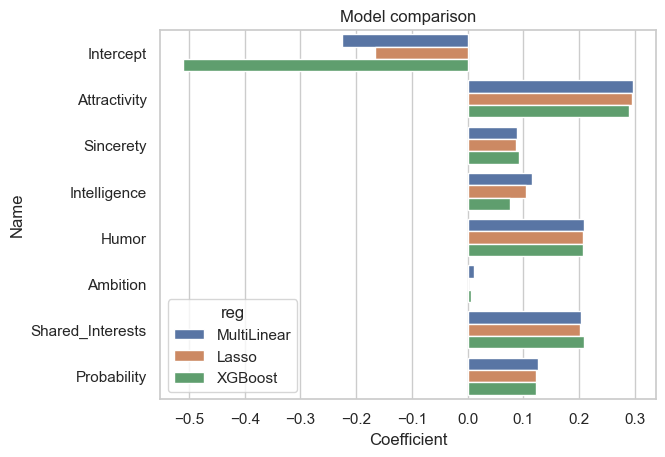

In [330]:
sns.barplot(dfdisplay,y="Name",x="Coefficient",hue="reg").set(title='Model comparison')

for the non Linear Model, Shared Interests are above Attractivity while performing the same in the comparison metrics

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

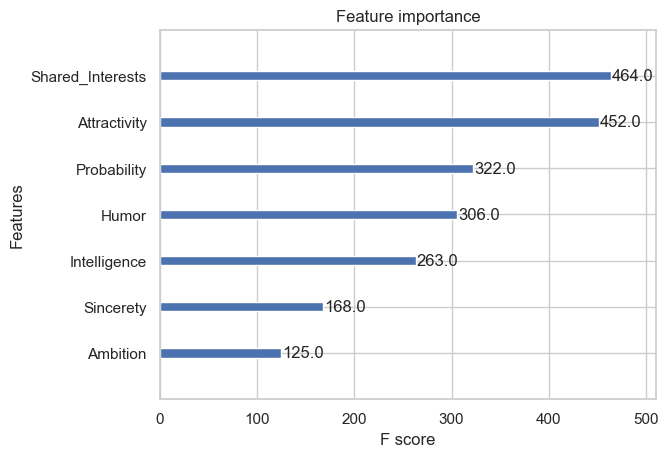

In [331]:
xg.plot_importance(regxgnolin)

## Permutation feature importance

when analysing permutations importances, it can be also seen, that Attractivity, Shared Interests and Humor have the most impact on the Like factor of all Personal Values

In [332]:
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi=permutation_importance(regxg,X_test,y_test,n_repeats=30,random_state=0,scoring=scoring)
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
      #  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {features[i]:<8}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    Attractivity0.195 +/- 0.010
    Shared_Interests0.119 +/- 0.010
    Humor   0.093 +/- 0.008
    Probability0.044 +/- 0.004
    Sincerety0.015 +/- 0.002
    Intelligence0.007 +/- 0.002
    Ambition-0.000 +/- 0.000
neg_mean_absolute_percentage_error
    Humor   4267764500383.689 +/- 1141311711711.970
    Shared_Interests2086554259409.975 +/- 1478228905773.436
    Intelligence1804157795872.911 +/- 359423037496.186
    Probability565355080636.336 +/- 554861781362.568
    Sincerety408148871633.866 +/- 508477825373.831
    Attractivity249111340580.597 +/- 1425605210884.129
    Ambition81444871822.291 +/- 31711406564.621
neg_mean_squared_error
    Attractivity0.690 +/- 0.036
    Shared_Interests0.420 +/- 0.034
    Humor   0.330 +/- 0.028
    Probability0.157 +/- 0.016
    Sincerety0.052 +/- 0.009
    Intelligence0.026 +/- 0.006
    Ambition-0.001 +/- 0.000


In [333]:
dfscatter_Multilin= pd.DataFrame({'True Values':y_test,"Predicted Values":reg.predict(X_test),"type":"Multilinear"})
dfscatter_Lasso= pd.DataFrame({'True Values':y_test,"Predicted Values":lasso_best.predict(X_test),"type":"Lasso"})
dfscatter_XGboost=pd.DataFrame({'True Values':y_test,"Predicted Values":predictions,"type":"XGBOOST"})
dfscatter_XGboostnolin=pd.DataFrame({'True Values':y_test,"Predicted Values":predictionsnolin,"type":"XGBOOSTnolin"})
dfscatter=pd.concat([dfscatter_Multilin,dfscatter_Lasso,dfscatter_XGboost,dfscatter_XGboostnolin])

## Comparison of Predicted to True Values

We can see, that each model performs roughtly the same, with the Nolinear XGBoosted model being less scattered

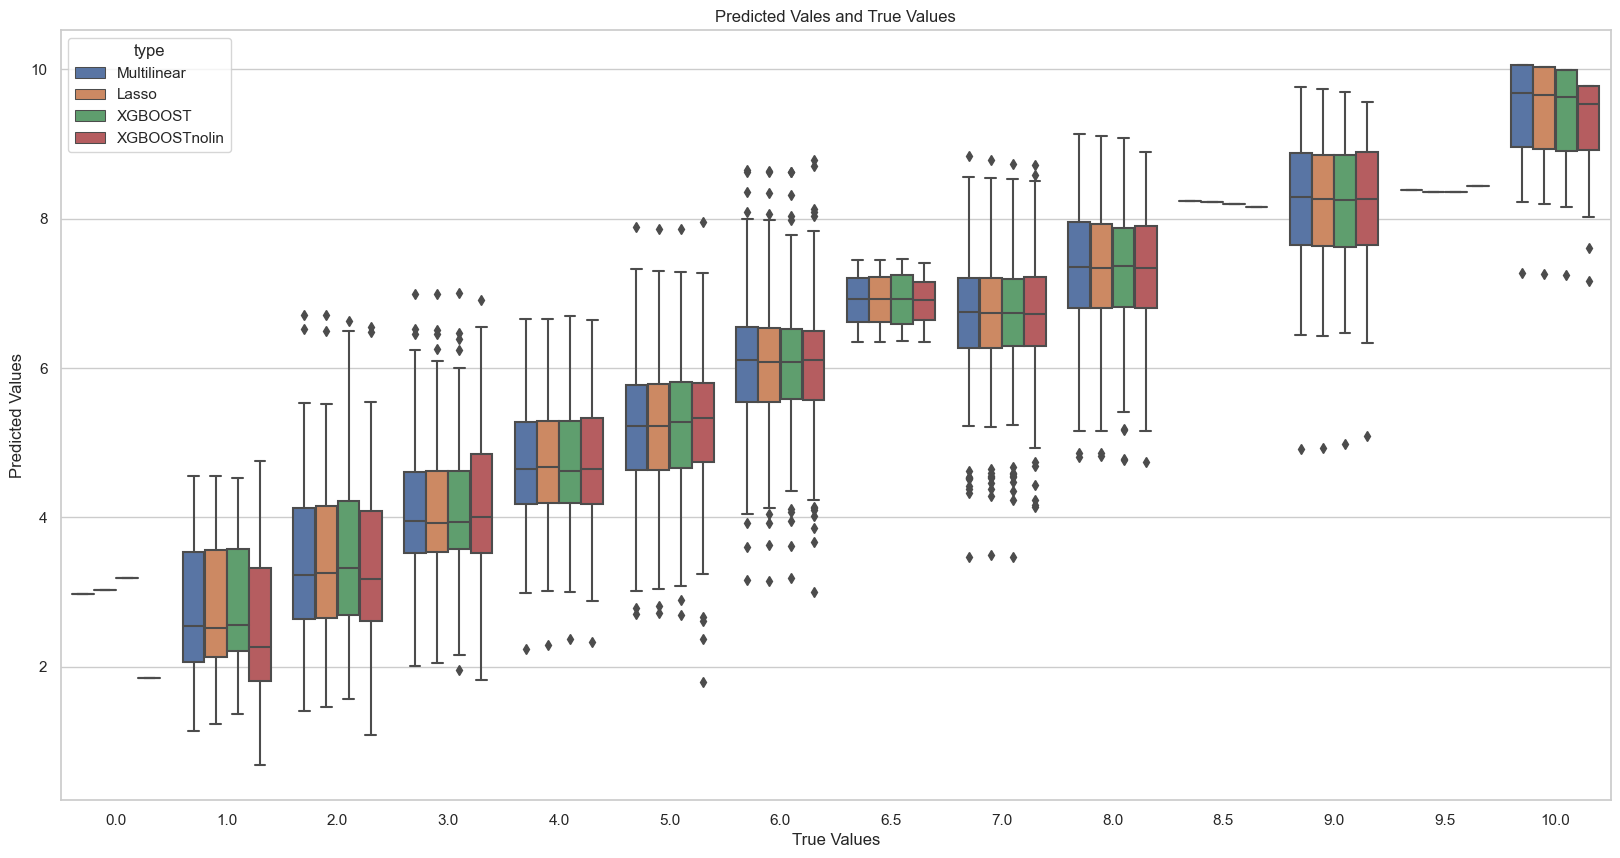

In [334]:
d=sns.boxplot(dfscatter,hue="type",x="True Values",y="Predicted Values")
d.set(title='Predicted Vales and True Values')
d.figure.set_size_inches(20,10)

### Residualplots to display the leftover variation.

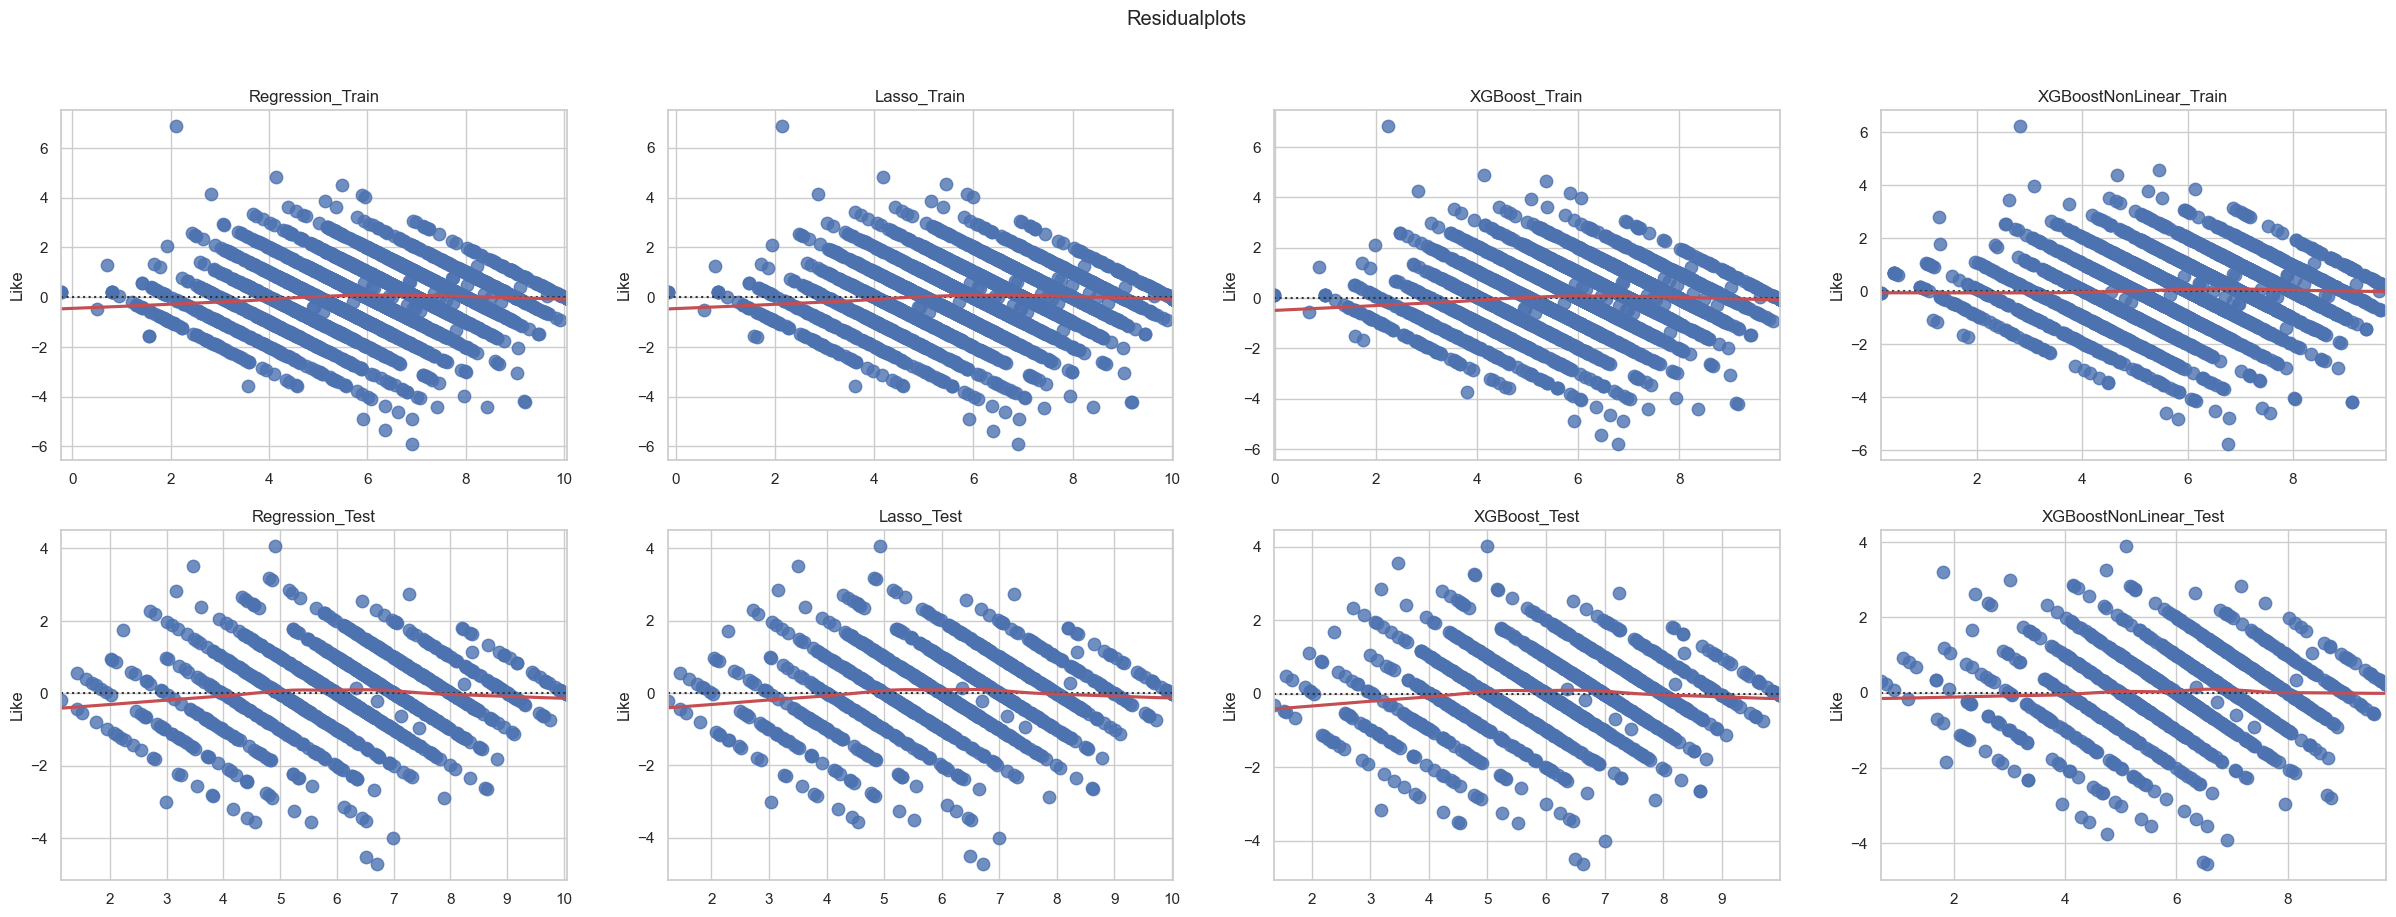

In [335]:
y_predtestreg= reg.predict(X_train)
y_predtestlasso=lasso.predict(X_train)
y_predtestXG = regxg.predict(X_train)
y_predtestXGnoLin= regxgnolin.predict(X_train)
y_predreg= reg.predict(X_test)
y_predlasso=lasso.predict(X_test)
y_predXG = regxg.predict(X_test)
y_predXGnoLin= regxgnolin.predict(X_test)
fig, ax=plt.subplots(2,4)
sns.residplot(x=y_predtestreg, y=y_train, scatter_kws={"s": 80},ax=ax[0,0],lowess=True,line_kws=dict(color="r"))
sns.residplot(x=y_predtestlasso, y=y_train, scatter_kws={"s": 80},ax=ax[0,1],lowess=True,line_kws=dict(color="r"))
sns.residplot(x=y_predtestXG, y=y_train, scatter_kws={"s": 80},ax=ax[0,2],lowess=True,line_kws=dict(color="r"))
sns.residplot(x=y_predtestXGnoLin, y=y_train, scatter_kws={"s": 80},ax=ax[0,3],lowess=True,line_kws=dict(color="r"))
sns.residplot(x=y_predreg, y=y_test, scatter_kws={"s": 80},ax=ax[1,0],lowess=True,line_kws=dict(color="r"))
sns.residplot(x=y_predlasso, y=y_test, scatter_kws={"s": 80},ax=ax[1,1],lowess=True,line_kws=dict(color="r"))
sns.residplot(x=y_predXG, y=y_test, scatter_kws={"s": 80},ax=ax[1,2],lowess=True,line_kws=dict(color="r"))
sns.residplot(x=y_predXGnoLin, y=y_test, scatter_kws={"s": 80},ax=ax[1,3],lowess=True,line_kws=dict(color="r"))
sns.set_theme(style="whitegrid")
fig.suptitle("Residualplots")
ax[0,0].set_title("Regression_Train")
ax[0,1].set_title("Lasso_Train")
ax[0,2].set_title("XGBoost_Train")
ax[0,3].set_title("XGBoostNonLinear_Train")
ax[1,0].set_title("Regression_Test")
ax[1,1].set_title("Lasso_Test")
ax[1,2].set_title("XGBoost_Test")
ax[1,3].set_title("XGBoostNonLinear_Test")
fig.set_size_inches(30,10)


# Load Models

run these codecells to check if Models are Loaded correctly.

In [336]:
with open(folder + pkl_filename_reg, 'rb') as file:
    pickle_modelreg = pickle.load(file)
pickle_modelreg

LinearRegression()

In [337]:
with open(folder + pkl_filenamelasso, 'rb') as file:
    pickle_modelLasso = pickle.load(file)
pickle_modelLasso

Lasso(alpha=0.018149939617142067)

In [338]:
with open(folder + pkl_filenamexgboost, 'rb') as file:
    pickle_modelxgboost = pickle.load(file)
pickle_modelxgboost

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=-1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=0, num_parallel_tree=None, predictor=None,
             random_state=0, ...)

In [339]:
with open(folder + pkl_filenamexgboostnolin, 'rb') as file:
    pickle_modelxgboostnolin = pickle.load(file)
pickle_modelxgboostnolin

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.015, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=700, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

# Conclusions

- All Four algoryhms define attractiveness as main factor to be liked


### With the data from this survey and our used statistical methods and classification, we could answer the following research questions:

-   **What are the most effective characteristics to achieve a match in opposite sex speed dating?**
    -   We can see that Attractiveness is the most important characteristic for a match, followed by Shared Interests and Funniness.

To strengthen our main research question, we answered the following sub-questions:

-   **Do specific characteristics affect the match selection of the survey participants?**
    -   Yes, all specific characteristics affect the match selection of the survey participants, some more, some less.
-   **Do these specific characteristics occur in both sexes?**
    - There is no significant correlation between gender and like
-   **What type of persons participate in speed dating events?**
    - There is no F-Value significance for gender or other characteristics besides attributes
-   **Is there a significant difference between the number of men calling women or women calling men after three weeks?**
    - We didn't investigate that in detail


Null hypothesis: 
-   **There is no affection of having specific characteristics regarding match selection of the survey participants**
    - This does not hold true, the characteristics are described above.
-   **There is no correlation between shared interests, attributes and getting a match**
    - This does not hold true, the characteristics are described above.

Hypotheses:
-   **Survey participants who both have the specific characteristics same race and opposite gender tend to achieve more matches**
    - We didn't investigate that in detail, but we saw a rather negative correlation between same race and match. (See classification)
-   **Survey participants with a higher income tend to achieve more matches than survey participants with a lower income**
    - We didn't investigate that in detail, as the income wasn't an important feature for our model. (See classification)
-   **Achieving matches because of having the same specific characteristics occur in both sexes**
    - Yes, this hypotheses is true. (See classification)
-   **Three weeks after the event, males called women more often**
    - Yes, by the factor of four. (See classification)